In [1]:
cd /ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/

In [2]:
alias bigwig2wig="/staging/leuven/stg_00041/software/bigwig2wig/bigWigToWig"
alias wig2bed="/staging/leuven/stg_00041/software/bedops_v2.4.36/wig2bed"
alias sortbed="/staging/leuven/stg_00041/software/bedops_v2.4.36/sort-bed"
alias bedmap="/staging/leuven/stg_00041/software/bedops_v2.4.36/bedmap"

sort the ATAC bed files by position 

In [15]:
sortbed --max-mem 8G cluster1.bed > cluster1_sorted.bed
sortbed --max-mem 8G cluster2.bed > cluster2_sorted.bed
sortbed --max-mem 8G cluster3.bed > cluster3_sorted.bed
sortbed --max-mem 8G cluster4.bed > cluster4_sorted.bed
sortbed --max-mem 8G cluster5.bed > cluster5_sorted.bed
sortbed --max-mem 8G cluster6.bed > cluster6_sorted.bed
sortbed --max-mem 8G cluster7.bed > cluster7_sorted.bed
sortbed --max-mem 8G cluster8.bed > cluster8_sorted.bed
sortbed --max-mem 8G cluster9.bed > cluster9_sorted.bed
sortbed --max-mem 8G cluster10.bed > cluster10_sorted.bed

Score the enrichment with bedmap sum and mean

In [3]:
for f in `ls -1 *cluster_sorted.bed | sed 's/cluster_sorted.bed//'`; do bedmap --sum ${f}cluster_sorted.bed Maz_ESCs_Prdm14.bed > ${f}cluster_Prdm14_sum.bed; done

### Kernel: R

In [1]:
library(ggplot2)
library(dplyr)
library(readr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/")

In [3]:
# Importing the raw results and storing in variable
cluster1_Prdm14_sum <- read_csv("1cluster_Prdm14_sum.bed", col_names = FALSE)
cluster2_Prdm14_sum <- read_csv("2cluster_Prdm14_sum.bed", col_names = FALSE)
cluster3_Prdm14_sum <- read_csv("3cluster_Prdm14_sum.bed", col_names = FALSE)
cluster4_Prdm14_sum <- read_csv("4cluster_Prdm14_sum.bed", col_names = FALSE)
cluster5_Prdm14_sum <- read_csv("5cluster_Prdm14_sum.bed", col_names = FALSE)
cluster6_Prdm14_sum <- read_csv("6cluster_Prdm14_sum.bed", col_names = FALSE)
cluster7_Prdm14_sum <- read_csv("7cluster_Prdm14_sum.bed", col_names = FALSE)
cluster8_Prdm14_sum <- read_csv("8cluster_Prdm14_sum.bed", col_names = FALSE)
cluster9_Prdm14_sum <- read_csv("9cluster_Prdm14_sum.bed", col_names = FALSE)
cluster10_Prdm14_sum <- read_csv("10cluster_Prdm14_sum.bed", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)


In [4]:
head(cluster1_Prdm14_sum)

X1
6
39
47
1
5
5


In [5]:
cluster1_Prdm14_sum <- as.data.frame(cluster1_Prdm14_sum)
cluster2_Prdm14_sum <- as.data.frame(cluster2_Prdm14_sum)
cluster3_Prdm14_sum <- as.data.frame(cluster3_Prdm14_sum)
cluster4_Prdm14_sum <- as.data.frame(cluster4_Prdm14_sum)
cluster5_Prdm14_sum <- as.data.frame(cluster5_Prdm14_sum)
cluster6_Prdm14_sum <- as.data.frame(cluster6_Prdm14_sum)
cluster7_Prdm14_sum <- as.data.frame(cluster7_Prdm14_sum)
cluster8_Prdm14_sum <- as.data.frame(cluster8_Prdm14_sum)
cluster9_Prdm14_sum <- as.data.frame(cluster9_Prdm14_sum)
cluster10_Prdm14_sum <- as.data.frame(cluster10_Prdm14_sum)


In [6]:
cluster1_Prdm14_sum$cluster <- "C1"
cluster2_Prdm14_sum$cluster <- "C2"
cluster3_Prdm14_sum$cluster <- "C3"
cluster4_Prdm14_sum$cluster <- "C4"
cluster5_Prdm14_sum$cluster <- "C5"
cluster6_Prdm14_sum$cluster <- "C6"
cluster7_Prdm14_sum$cluster <- "C7"
cluster8_Prdm14_sum$cluster <- "C8"
cluster9_Prdm14_sum$cluster <- "C9"
cluster10_Prdm14_sum$cluster <- "C10"

In [7]:
ATACclusters_Prdm14_sum_merged <- rbind(cluster1_Prdm14_sum,
                                        cluster2_Prdm14_sum,
                                        cluster3_Prdm14_sum,
                                        cluster4_Prdm14_sum,
                                        cluster5_Prdm14_sum,
                                        cluster6_Prdm14_sum,
                                        cluster7_Prdm14_sum,
                                        cluster8_Prdm14_sum,
                                        cluster9_Prdm14_sum,
                                        cluster10_Prdm14_sum)

In [8]:
head(ATACclusters_Prdm14_sum_merged)

X1,cluster
6,C1
39,C1
47,C1
1,C1
5,C1
5,C1


In [9]:
ATACclusters_Prdm14_sum_merged$cluster <- factor(ATACclusters_Prdm14_sum_merged$cluster, levels = c("C6", "C1", "C7","C8","C5","C3","C9","C2","C10","C4"))

In [12]:
Prdm14 <- ggplot(ATACclusters_Prdm14_sum_merged, aes(x=as.factor(cluster),y=X1, color = cluster))+
  geom_violin(aes(fill = cluster)) +
scale_y_log10()+
scale_fill_brewer(palette="Paired")+
scale_color_brewer(palette = "Paired")+
#coord_cartesian(ylim=c(0,50))+
geom_point(position = position_jitter(width = .3), alpha = .3, size = 1, color = "black", shape = 1)+
geom_boxplot(width=.2, color = "black", fill = "white")+

theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=14, color = "black"))+
xlab("") +
ylab("mean score")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Prdm14")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 29 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 29 rows containing non-finite values (stat_boxplot)."

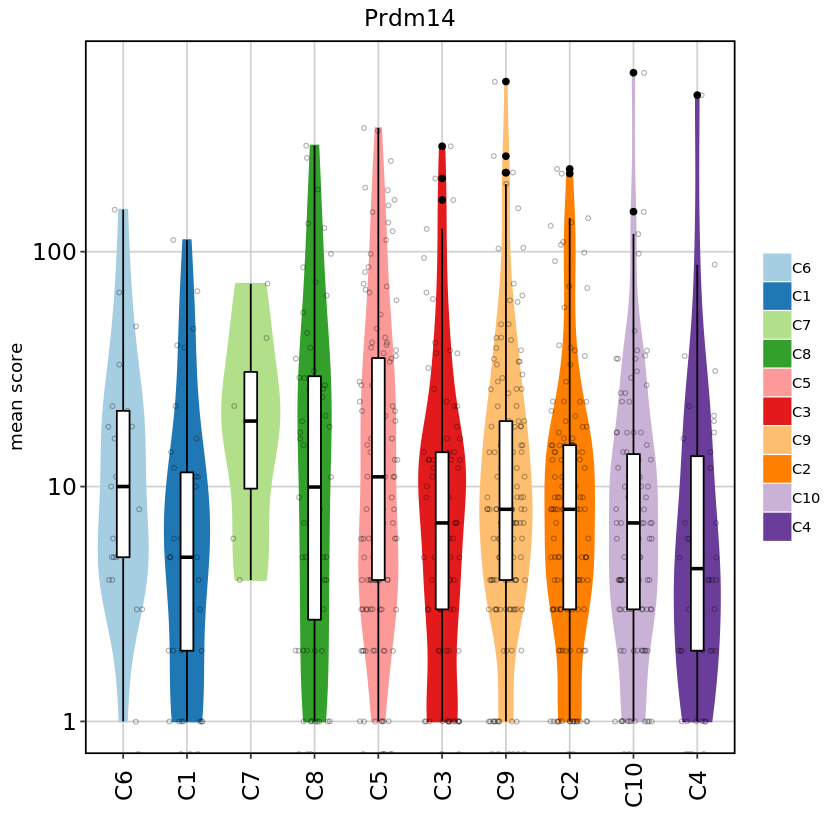

In [13]:
Prdm14

In [14]:
ggsave("ATACclusters_Prdm14_sum_log10.pdf")

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 29 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 29 rows containing non-finite values (stat_boxplot)."

In [25]:
ggsave("ATACclusters_Prdm14_sum_zoom.pdf")

Saving 6.67 x 6.67 in image


In [26]:
pairwise.wilcox.test(ATACclusters_Prdm14_sum_merged$X1, ATACclusters_Prdm14_sum_merged$cluster, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"


	Pairwise comparisons using Wilcoxon rank sum test 

data:  ATACclusters_Prdm14_sum_merged$X1 and ATACclusters_Prdm14_sum_merged$cluster 

    C6     C1     C7     C8     C5     C3     C9     C2     C10   
C1  0.0936 -      -      -      -      -      -      -      -     
C7  0.2205 0.0237 -      -      -      -      -      -      -     
C8  0.9661 0.0705 0.3374 -      -      -      -      -      -     
C5  0.8566 0.0126 0.2931 0.6825 -      -      -      -      -     
C3  0.3056 0.2285 0.0495 0.2542 0.0581 -      -      -      -     
C9  0.8060 0.0232 0.1231 0.8041 0.4665 0.1580 -      -      -     
C2  0.3426 0.1075 0.0473 0.3357 0.0774 0.6299 0.2233 -      -     
C10 0.1933 0.2558 0.0324 0.1874 0.0223 0.8864 0.0600 0.4715 -     
C4  0.0281 0.6667 0.0126 0.0245 0.0018 0.0971 0.0028 0.0238 0.0717

P value adjustment method: none 